## Regressão linear utilizando o iris data set

A história do iris data set pode ser consultada em https://en.wikipedia.org/wiki/Iris_flower_data_set

Exemplos retirados de: https://deparkes.co.uk/2016/11/18/python-linear-regression/

### Método 1: utilizando o método (função) linregress da biblioteca SciPy

0.41575541635241114 -0.36307552131902776


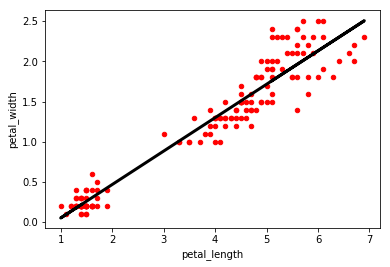

In [9]:
# load iris sample dataset
import seaborn.apionly as sns
iris = sns.load_dataset('iris')
# print(iris)

# import scipy
from scipy import polyval, stats
fit_output = stats.linregress(iris["petal_length"], iris["petal_width"])
slope, intercept, r_value, p_value, slope_std_error = fit_output
print(slope, intercept)

# use scipy polyval to create y-values from x_data and the 
# linregress fit parameters
scipy_fitted_y_vals = polyval([slope,intercept],iris["petal_length"]) 

#Apresentar os resultados num gráfico
import matplotlib.pyplot as plt
axes = iris.plot(x="petal_length", y="petal_width", kind="scatter", color="red")
plt.plot(iris["petal_length"], scipy_fitted_y_vals, color='black', linewidth=3)
plt.show()


### Método 2: biblioteca statmodels

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):           4.68e-86
Time:                        23:11:16   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3631      0.040     -9.131   

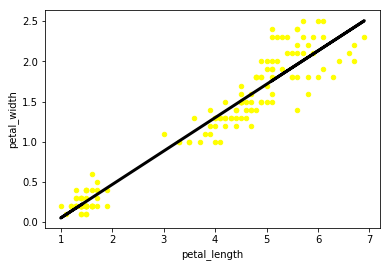

In [10]:
# load iris sample dataset
import seaborn.apionly as sns
iris = sns.load_dataset('iris')
 
import statsmodels.api as sm
 
# fit with statsmodels
# add constant intercept 
X = sm.add_constant(iris["petal_length"])
 
model = sm.OLS(iris["petal_width"], X)
results = model.fit()
statsmodels_y_fitted = results.predict()

print(results.summary())

import matplotlib.pyplot as plt
axes = iris.plot(x="petal_length", y="petal_width", kind="scatter", color="yellow")
plt.plot(iris["petal_length"], results.predict(), color='black', linewidth=3)
plt.show()

### Método 3: utilizando a biblioteca scikit-learn

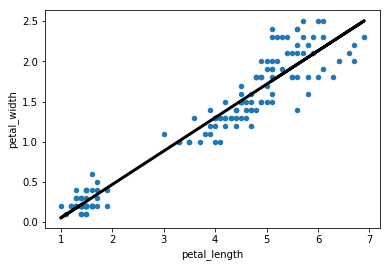

In [11]:
from sklearn import datasets, linear_model
import pandas as pd
import matplotlib.pyplot as plt
 
# Reshape dataframe values for sklearn
fit_data = iris[["petal_length", "petal_width"]].values
x_data = fit_data[:,0].reshape(-1,1)
y_data = fit_data[:,1].reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()
# once the data is reshaped, running the fit is simple
regr.fit(x_data, y_data)
 
# we can then plot the data and out fit
axes = iris.plot(x="petal_length", y="petal_width", kind="scatter")
plt.plot(x_data, regr.predict(x_data), color='black', linewidth=3)
plt.show()

